# Importation des bibliothèques 

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 108.0 MB/s eta 0:00:00


In [ ]:
%pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.0 MB/s 


In [ ]:
import torch
import seaborn
import os
import numpy as np
import pandas as pd
import torch.nn as nn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import CamembertForSequenceClassification, CamembertTokenizer, AdamW
# Chargement du GPU
device = torch.device("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

# Importation du jeu de données et Encodage

In [ ]:
#Chargement du jeu de données
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_excel("/content/drive/MyDrive/codif_compta.xlsx")
df.head(20)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,NCC,RAISON SOCIALE,SIGLE,ACTIVITE PRINCIPALE,BRANCHE D'ACTIVITE (CAPCN*),LIBELLE D'ACTIVITE DETAILLE,CODE PRODUIT (CAPCN*),NOMBRE_OCCUR,class,libelle_concat
0,9815068B,BARRY CALLEBAUT NEGOCE,BCN SA,USINAGHE ET EXPORTATIO DE FEVES DE CACAO,G34002,VENTE DE CACAO,G34002000,2258,29,USINAGHE ET EXPORTATIO DE FEVES DE CACAO plus ...
1,9606123E,ORANGE COTE D'IVOIRE SA,NaN,"Télécommunications, fournisseurs d'accès internet",J37004,TELECOMMUNICATIONS,J37004001,189,42,"Télécommunications, fournisseurs d'accès inter..."
2,7603142C,TOTAL COTE D'IVOIRE SA,TOTAL CI,DISTRIBUTION,G34003,COMMERCE DE GROS DE CARBURANTS ET DE COMBUSTIBLES,G34003002,566,31,DISTRIBUTION plus précisément COMMERCE DE GROS...
3,9818944H,SOCIETE DE DISTRIBUTION DE TOUTES MARCHANDISES...,SDTM-CI,IMPORT ET EXPORT DIISTRIBUTION,G34003,VENTES LOCALES,G34003002,566,31,IMPORT ET EXPORT DIISTRIBUTION plus précisémen...
4,0100690X,VIVO ENERGY CÔTE D'IVOIRE,VIVO ENERGY CI,DISTRIBUTION DE PRODUITS PETROLIERS,G34004,DISTRIBUTION DE PRODUITS PETROLIERS,G34004000,11443,32,DISTRIBUTION DE PRODUITS PETROLIERS plus préci...
5,8607802Q,CARGILL WEST AFRICA,CWA,NEGOCEDE CAFE ET CACAO,G34002,NEGOCES DE CACAO,G34002000,2258,29,NEGOCEDE CAFE ET CACAO plus précisément NEGOCE...
6,9606689W,MTN COTE D'IVOIRE,NaN,"Télécommunications, fournisseurs d'accès internet",J37004,VENTES SERVICES TELECOM,J37004001,189,42,"Télécommunications, fournisseurs d'accès inter..."
7,5011806N,SOCIETE IVOIRIENNE DE PROMOTION DE SUPERMARCHES,PROSUMA,GRANDE DISTRIBUTION,G34003,GRANDE DISTRIBUTION,G34003002,566,31,GRANDE DISTRIBUTION plus précisément GRANDE DI...
8,0179308E,IVOIRIENNE DE DISTRIBUTION,IDIS,COMMERCE DE BOISSONS,G34002,COMMERCE DE BOISSONS,G34002000,2258,29,COMMERCE DE BOISSONS plus précisément COMMERCE...
9,0521319F,ATLANTIQUE TELECOM COTE D'IVOIRE,NaN,"Télécommunications, fournisseurs d'accès internet",J37004,Télephonie mobile,J37004001,189,42,"Télécommunications, fournisseurs d'accès inter..."


In [ ]:
df = df[['libelle_concat', 'class']]
df['Libelle'] = df['libelle_concat'].astype(str)
df['CODE_NEW_3_to_2'] = df['class'].astype(int)
#df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
Libelle = df['Libelle'].values.tolist()
CODE = df['CODE_NEW_3_to_2'].values.tolist()

In [ ]:
num_labels = len(df.iloc[:,1].unique())

In [ ]:
# split train dataset into train, validation and test sets
train_Libelle, temp_Libelle, train_CODE, temp_CODE = train_test_split(df['Libelle'], df['CODE_NEW_3_to_2'], random_state=2011, test_size=0.3)
val_Libelle, test_Libelle, val_CODE, test_CODE = train_test_split(temp_Libelle, temp_CODE, random_state = 2018, test_size = 0.5)

In [ ]:
# On charge l'objet "tokenizer"de camemBERT qui va servir a encoder
# 'camebert-base' est la version de camembert qu'on choisit d'utiliser
# 'do_lower_case' à True pour qu'on passe tout en miniscule
tokenizer = CamembertTokenizer.from_pretrained('camembert-base',do_lower_case=True)

Downloading:   0%|          | 0.00/811k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/508 [00:00<?, ?B/s]

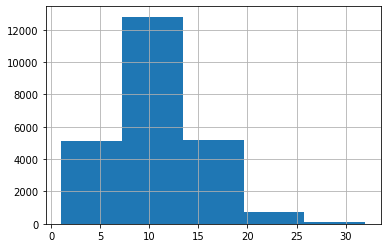

In [ ]:
# Distribution de la longueur des phrases
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_Libelle]

pd.Series(seq_len).hist(bins = 5)

In [ ]:
# Tokenisation des phases dans nos différents jeu de données avec max_length = 6 pour le padding 
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(train_Libelle,max_length = 30, pad_to_max_length=True,truncation=True,
                                           return_tensors = 'pt')

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(val_Libelle,max_length = 6,pad_to_max_length=True,truncation=True,
                                         return_tensors = 'pt')

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(test_Libelle,max_length = 4,pad_to_max_length=True,truncation=True,
                                            return_tensors = 'pt')

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2306: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
## convert lists to tensors / convertion des sequences de données en tenseurs pour optimiser les calculs

train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_CODE.tolist()) - 1

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_CODE.tolist()) - 1

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_CODE.tolist()) - 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: To copy 

In [ ]:
""" Nous allons maintenant créer des chargeurs de données pour le train et l'ensemble de validation. 
    Ces chargeurs de données transmettront des lots de données de train et de données de validation en entrée du modèle pendant la phase de formation.
"""

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

# Chargement du modèle

In [ ]:
# On la version pre-entrainee de camemBERT 'base'
model = CamembertForSequenceClassification.from_pretrained(
    'camembert-base',
    num_labels = num_labels)

# push the model to GPU
model = model.to(device)

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at camembert-base were not used when initializing CamembertForSequenceClassification: ['lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.out_proj.bias

# Hyperparamètres

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2.5e-5, # Learning Rate
                  eps = 1e-8 # Epsilon
)
epochs = 30

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


# Desequilibre des classes

In [ ]:
# il y a un déséquilibre dans les classes c-a-d il y a assez de spam que de non spam il faut donc en tenir compte
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_weights = compute_class_weight(class_weight='balanced', classes = np.unique(train_CODE), y= train_CODE)
class_weights = dict(zip(np.unique(train_CODE), class_weights))

d = list(class_weights.values())
d.append(0)

print("Class Weights:",class_weights)

# converting list of class weights to a tensor
weights= torch.tensor(list(class_weights.values()),dtype=torch.float)

weights = weights.to(device)

# define the loss function
cross_entropy  = nn.NLLLoss(weight=weights)

Class Weights: {1: 6.09982174688057, 2: 4.786013986013986, 3: 11.521885521885523, 4: 11.521885521885523, 5: 11.11038961038961, 6: 5.869639794168096, 7: 11.965034965034965, 8: 14.813852813852813, 9: 1.2057787174066243, 10: 3.988344988344988, 11: 9.721590909090908, 12: 5.2727272727272725, 13: 15.554545454545455, 14: 4.574866310160428, 15: 1.229608336327704, 16: 9.721590909090908, 17: 9.149732620320856, 18: 5.457735247208931, 19: 9.721590909090908, 20: 1.2854996243425996, 21: 6.481060606060606, 22: 1.8628198149156232, 23: 5.184848484848485, 24: 3.049910873440285, 25: 0.2106234997230258, 26: 0.5410276679841898, 27: 0.5210902999847723, 28: 1.0801767676767677, 29: 0.1962718669343275, 30: 4.860795454545454, 31: 0.803852478271083, 32: 0.03861605127742168, 33: 4.261519302615193, 34: 4.860795454545454, 35: 9.149732620320856, 36: 1.2057787174066243, 37: 0.7217886521830837, 38: 0.4720651124293006, 39: 0.6576974822217951, 40: 7.777272727272727, 41: 4.508563899868248, 42: 2.393006993006993, 43: 8.18

# Entrainement

In [ ]:
# fonctions pour ajuster le modele

# function to train the model
def train():

  model.train()
  total_loss, total_accuracy = 0, 0
  # empty list to save model predictions
  total_preds=[]
  # iterate over batches
  for step,batch in enumerate(train_dataloader):

    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]

    sent_id, mask, labels = batch

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask)
    _, logits = model(sent_id, 
                             token_type_ids=None, 
                             attention_mask=mask, 
                             labels=labels,return_dict=False)
    # compute the loss between actual and predicted values
    loss = cross_entropy(logits, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds = logits
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds
 
    
  #return 

# Evaluation

In [ ]:
# function for evaluating the model
def evaluate():
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
      #elapsed = format_time(time.time()-t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)
      #preds = logits
      _, logits = model(sent_id, 
                             token_type_ids=None, 
                             attention_mask=mask, 
                             labels=labels,return_dict=False)


      # compute the validation loss between actual and predicted values
      loss = cross_entropy(logits,labels)

      total_loss = total_loss + loss.item()
      preds = logits

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [ ]:

# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
#evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 30
  Batch    50  of    749.
  Batch   100  of    749.
  Batch   150  of    749.
  Batch   200  of    749.
  Batch   250  of    749.
  Batch   300  of    749.
  Batch   350  of    749.
  Batch   400  of    749.
  Batch   450  of    749.
  Batch   500  of    749.
  Batch   550  of    749.
  Batch   600  of    749.
  Batch   650  of    749.
  Batch   700  of    749.

Evaluating...
  Batch    50  of    161.
  Batch   100  of    161.
  Batch   150  of    161.

Training Loss: -1.554
Validation Loss: -4.224

 Epoch 2 / 30
  Batch    50  of    749.
  Batch   100  of    749.
  Batch   150  of    749.
  Batch   200  of    749.
  Batch   250  of    749.
  Batch   300  of    749.
  Batch   350  of    749.
  Batch   400  of    749.
  Batch   450  of    749.
  Batch   500  of    749.
  Batch   550  of    749.
  Batch   600  of    749.
  Batch   650  of    749.
  Batch   700  of    749.

Evaluating...
  Batch    50  of    161.
  Batch   100  of    161.
  Batch   150  of    161.

Training

# Predictions

In [ ]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
# get predictions for test data
with torch.no_grad():
  models = model(test_seq.to(device), test_mask.to(device))

In [ ]:
preds = models['logits'].detach().cpu().numpy()
preds = np.argmax(preds, axis = 1)
print(metrics.classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00        56
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00        14
          14       0.00      0.00      0.00        64
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         6
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
